<a href="https://colab.research.google.com/github/AKAALBRAMHA/Machine_Predictive_Maintenance./blob/main/Machine_Predictive_Maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Name :- Machine Predictive Maintenance

# Project Summary

##### **Project Type**    - Predictive Maintence Of Machine Failure
##### **Contribution**    - Individual
##### **Team Member 1 -**   Milind Patel

# Problem Statement


### Problem Statement: Predictive Maintenance for Industrial Machines

#### Data Set :- https://www.kaggle.com/datasets/shivamb/machine-predictive-maintenance-classification/data

#### Introduction
In industrial settings, predictive maintenance is crucial for preventing unexpected equipment failures and optimizing maintenance schedules. By accurately predicting machine failures, companies can reduce downtime, increase efficiency, and save on repair costs. However, obtaining real predictive maintenance datasets is challenging due to confidentiality and availability constraints. To address this, we provide a synthetic dataset that closely mimics real-world scenarios in predictive maintenance.

#### Dataset Description
The synthetic dataset consists of 10,000 data points, each represented by 14 features, designed to reflect real-world industrial maintenance data. The dataset includes the following features:

- **UID**: A unique identifier ranging from 1 to 10,000.
- **productID**: A combination of a letter (L, M, or H) indicating product quality (Low, Medium, High) and a variant-specific serial number.
  - **L**: Low quality (50% of products)
  - **M**: Medium quality (30% of products)
  - **H**: High quality (20% of products)
- **air temperature [K]**: Generated using a random walk process, normalized to a standard deviation of 2 K around 300 K.
- **process temperature [K]**: Derived from the air temperature with an additional 10 K and normalized to a standard deviation of 1 K.
- **rotational speed [rpm]**: Calculated based on a power of 2860 W, overlaid with normally distributed noise.
- **torque [Nm]**: Normally distributed around 40 Nm with a standard deviation of 10 Nm, ensuring no negative values.
- **tool wear [min]**: Varies with product quality, adding 5 minutes for high quality (H), 3 minutes for medium quality (M), and 2 minutes for low quality (L).
- **machine failure**: Indicates whether the machine has failed at the given data point. This is the primary target variable.
- **failure type**: Specifies the type of failure if a machine failure has occurred. This should not be used as a feature to avoid data leakage.

#### Objectives
The primary objective is to develop a predictive model that can accurately identify whether a machine will fail (machine failure) based on the provided features. A secondary objective is to classify the type of failure when a failure occurs.



# Data Collection


In [ ]:
# Importing Require Libraries
# Importing Analytic Libraries
import numpy as np  #Import Numpy
import pandas as pd #Import Pandas
# Importing Visualization Libraries
import matplotlib.pyplot as plt #Import Matplotlib
import seaborn as sns #Import Seaborn

In [ ]:
path = "/content/predictive_maintenance.csv"  # Path Of file in google colab
pred_df = pd.read_csv(path) # Reading .csv file using pandas

In [ ]:
pred_df  # First Look At DataFrame

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [ ]:
pred_df.columns # Reading columns of the dataset

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type'],
      dtype='object')

In [ ]:
pred_df.describe()  # Getting insight of the numeric data

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [ ]:
# Getting total count of column and rows
print(f"Total number of rows are : {pred_df.shape[0]}")
print(f"Total number of coulumns are : {pred_df.shape[1]}")

Total number of rows are : 10000
Total number of coulumns are : 10


In [ ]:
pred_df.info()  # Info of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


At the end of this process we can conclude that the dataset has 10,000 rows and 10 columns so it came under large dataset. Also, most of the columns are of int and float type. And the target columns for this data will be "Target" and "Failure Type".

# Data Preprocessing

In [ ]:
pred_df.duplicated().sum()  # Getting sum of total duplicate value.

0

In [ ]:
pred_df.isna().sum()  # Getting sum of total null values in the dataset

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Target                     0
Failure Type               0
dtype: int64

In [ ]:
pred_df.drop(pred_df.columns[0:2], axis=1, inplace=True)  # Drop ID & UID
pred_df.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,M,298.1,308.6,1551,42.8,0,0,No Failure
1,L,298.2,308.7,1408,46.3,3,0,No Failure
2,L,298.1,308.5,1498,49.4,5,0,No Failure
3,L,298.2,308.6,1433,39.5,7,0,No Failure
4,L,298.2,308.7,1408,40.0,9,0,No Failure


1. Their are zero duplicate values in this dataset.
2. Their are zero missing/ null values in this dataset.
3. Drop ID & UID since they provide no information

# Exploratory Data Analysis (EDA)

#### Chart 1

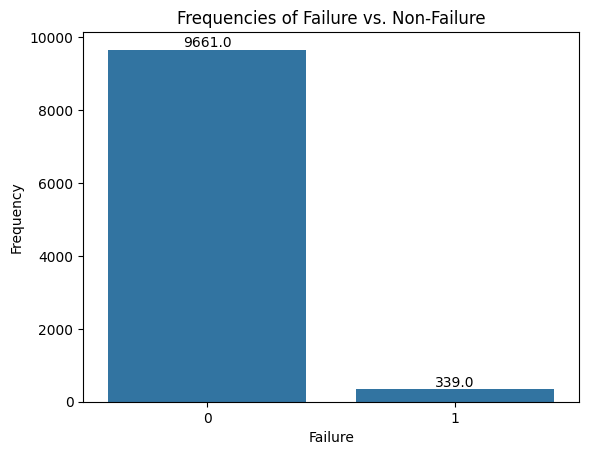

In [ ]:
# Create a bar graph of No. of Failures vs Non-Failures
sns.countplot(x='Target', data=pred_df)

plt.xlabel('Failure')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure vs. Non-Failure')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')
plt.show()

Frequency of no-failue is more than failure.

#### Chart 2

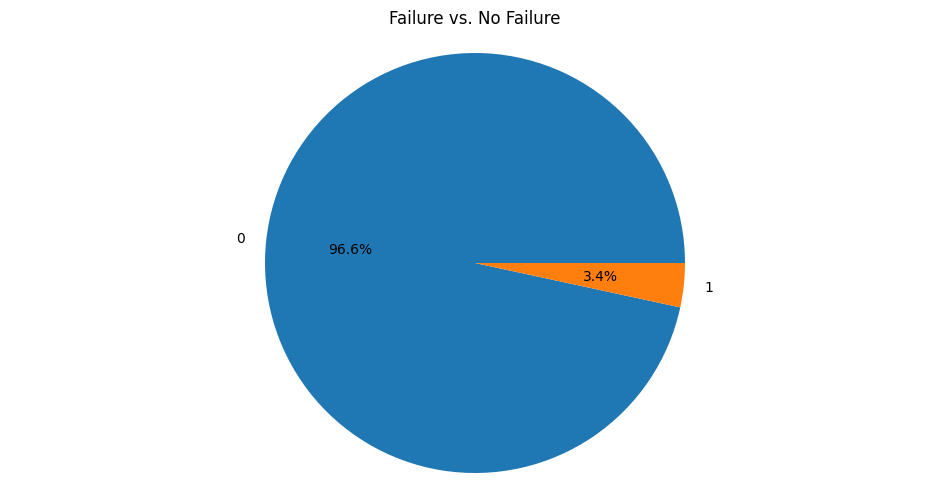

In [ ]:
# Create a pie chart of Failures vs No Failures
category_counts = pred_df['Target'].value_counts()

plt.figure(figsize = (12, 6))
sns.color_palette("Set2")
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Failure vs. No Failure')
plt.show()

Percentage of failure is less than no-failure. The percentage of no-failure is 96.6 % while failure is only 3.4%.

#### Chart 3

<ipython-input-13-e25b0474b57b>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Failure Type', data=pred_df, palette ="Set2")


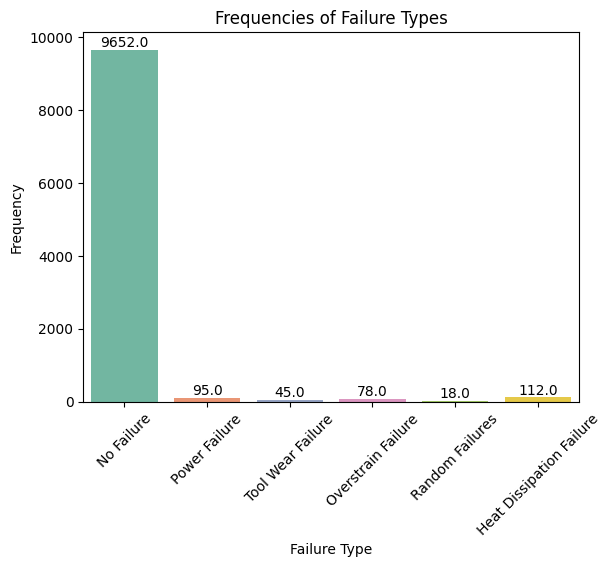

In [ ]:
sns.countplot(x='Failure Type', data=pred_df, palette ="Set2")
plt.xlabel('Failure Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Failure Types')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

The most failure is occured due to Heat Dissipation Failure following power failure, overstrain failure, tool wear failure and random failure.

1. Heat Dissipation Failure = 112
2. Power Failure = 95
3. Overstrain Failure = 78
4. Tool Wear Failure = 45
5. Random Failure = 18


#### Chart 4

<ipython-input-14-01acebc9d8ca>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Type', data=pred_df, palette ="Set2")


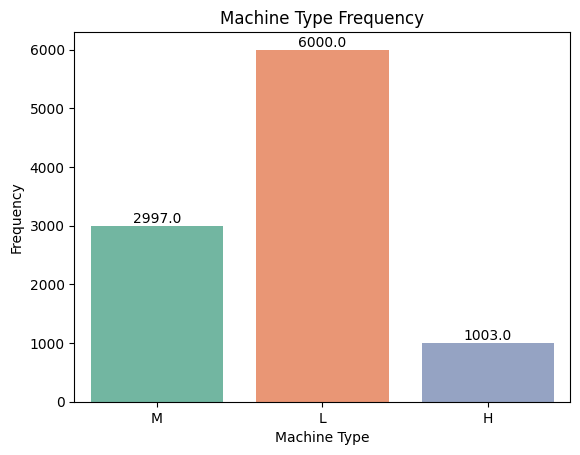

In [ ]:
# Create Bar Graph of Machine Type Frequency
sns.countplot(x='Type', data=pred_df, palette ="Set2")
plt.xlabel('Machine Type')
plt.ylabel('Frequency')
plt.title('Machine Type Frequency')

# Add count annotations above each bar
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.show()

Number of machine on the basis of type :-
1. High = 1003
2. Medium = 2997
3. Low = 6000

We can conclude that the Low type of machine has hoghrst count.

#### Chart 5

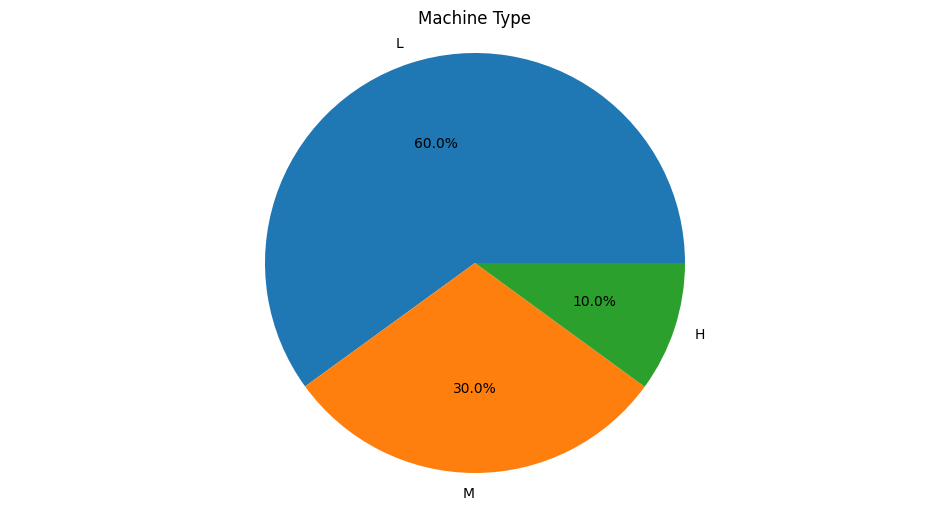

In [ ]:
# Create Pie Chart of Machine Type Frequency
category_counts = pred_df['Type'].value_counts()
sns.color_palette("Set2")
plt.figure(figsize=(12,6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Machine Type')
plt.show()

Percentage wise the Low type of machine contributes 60%, while Medium and High contributes 30% and 10% respectively.

#### Chart 6

<Axes: xlabel='Torque [Nm]', ylabel='Rotational speed [rpm]'>

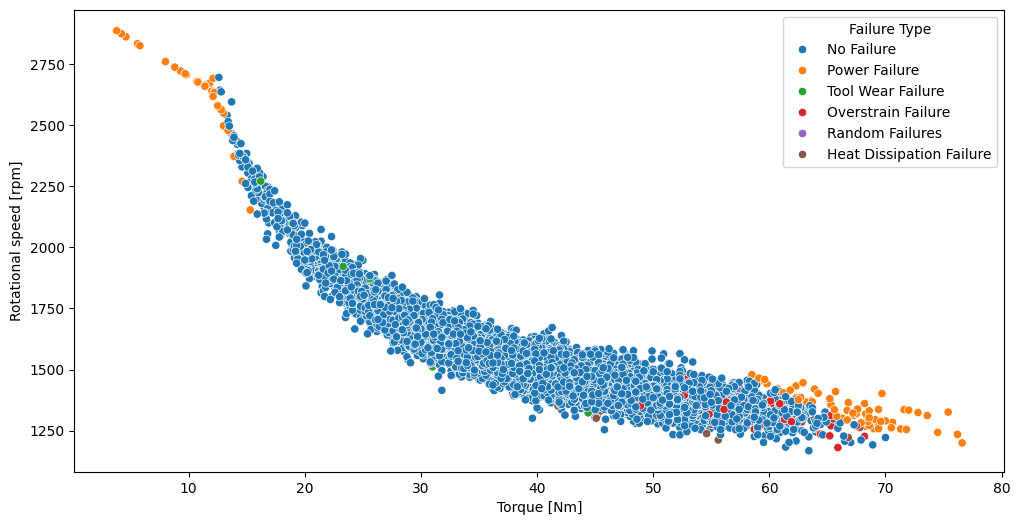

In [ ]:
# Scatter plot
sns.color_palette("Set2")
plt.figure(figsize=(12,6))
sns.scatterplot(data=pred_df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type", palette="tab10")

We can conclude that the failure is mostly occuring due to low torque and high speed or wise-versa. In the middle their is low chance of failure.

#### Chart 7

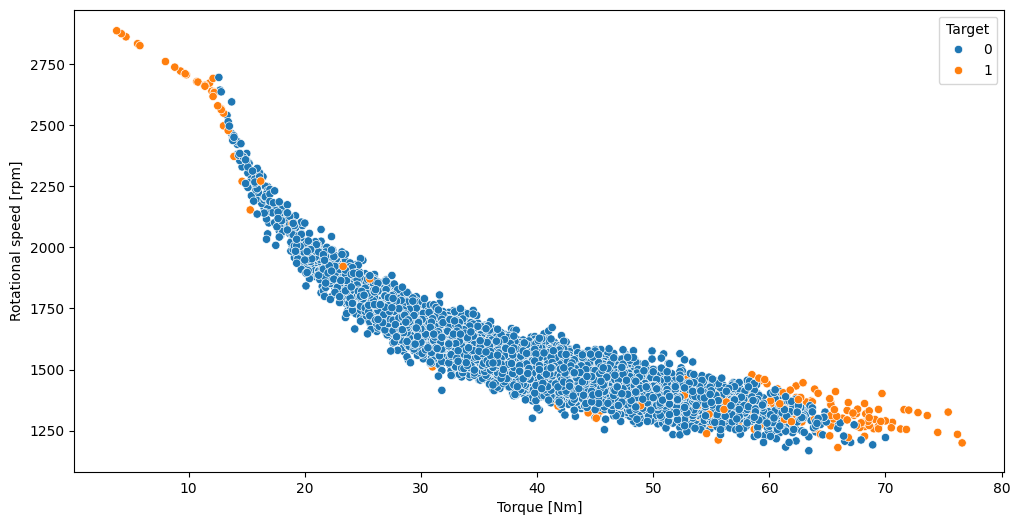

In [ ]:
# Scatter plot
sns.color_palette("Set2")
plt.figure(figsize=(12,6))
sns.scatterplot(data=pred_df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Target",palette="tab10");

#### Chart 8

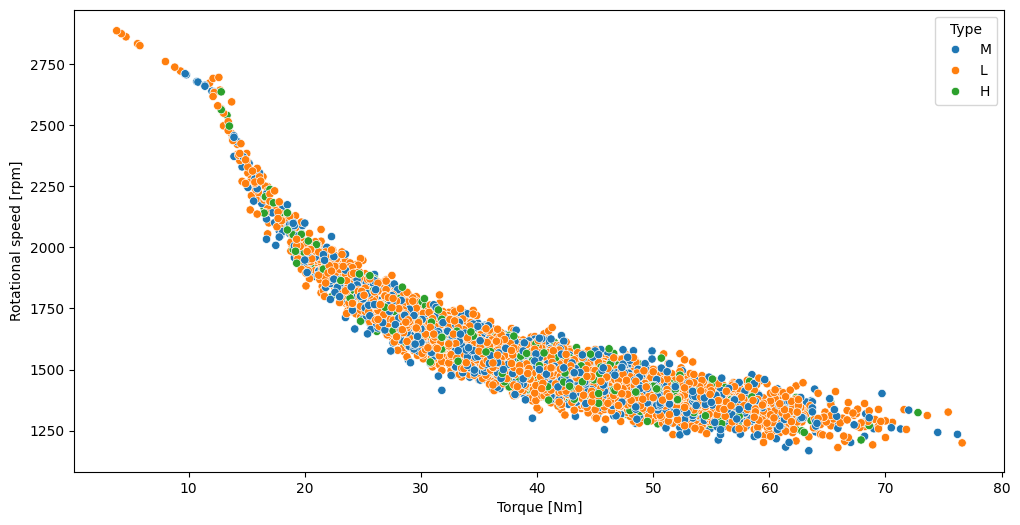

In [ ]:
# Scatter plot
sns.color_palette("Set2")
plt.figure(figsize=(12,6))
sns.scatterplot(data=pred_df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Type",palette="tab10");

#### Chart 9

<Figure size 600x400 with 0 Axes>

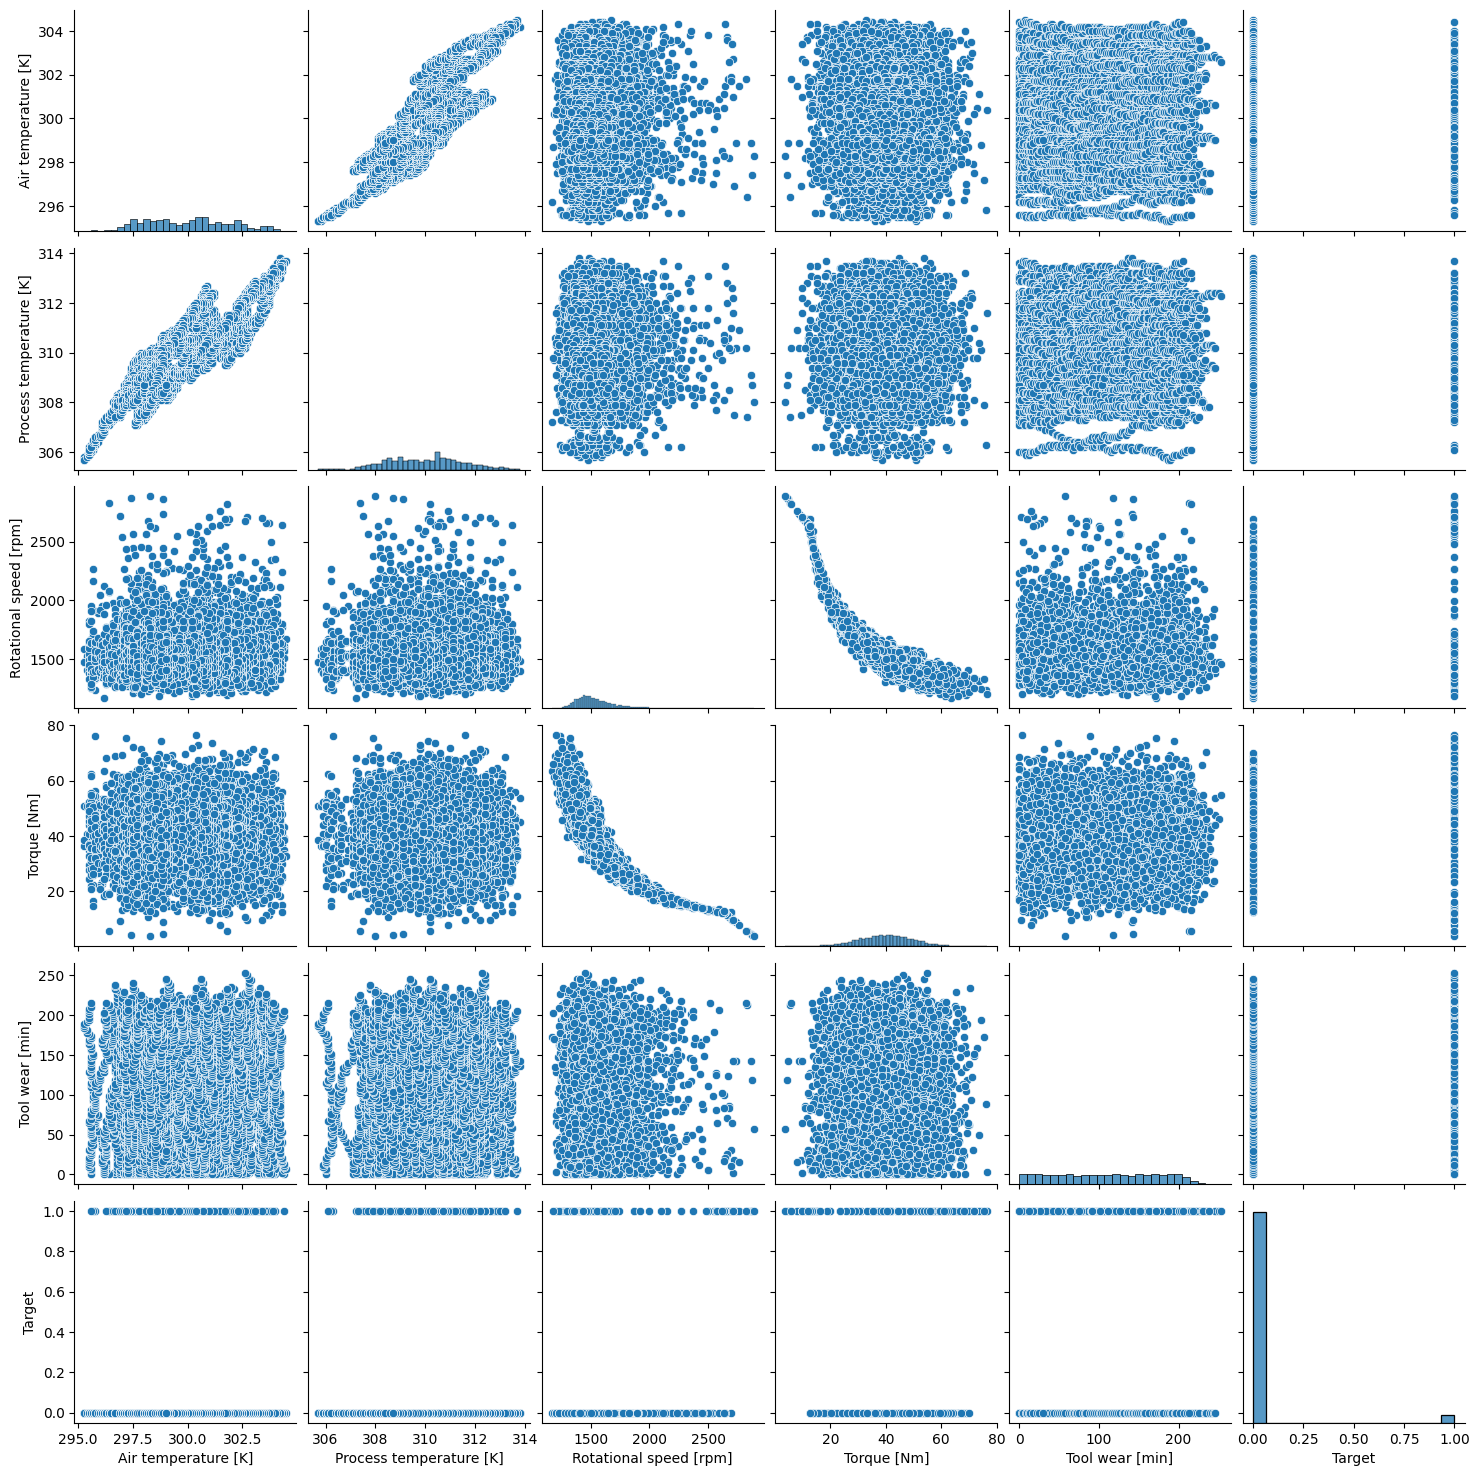

In [ ]:
# Use pairplot
plt.figure(figsize=(6,4))
sns.pairplot(data=pred_df)

Exploring relation between target variable and numeric feature.

#### Chart 10

<ipython-input-27-5bcd7c45b293>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pred_df,x="Failure Type", y="Air temperature [K]", palette="coolwarm",ax=axes[0,0])
<ipython-input-27-5bcd7c45b293>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")
<ipython-input-27-5bcd7c45b293>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pred_df,x="Failure Type", y="Process temperature [K]", palette="coolwarm",ax=axes[0,1])
<ipython-input-27-5bcd7c45b293>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0,1].set_xticklabels(axes[0,1].get_xticklab

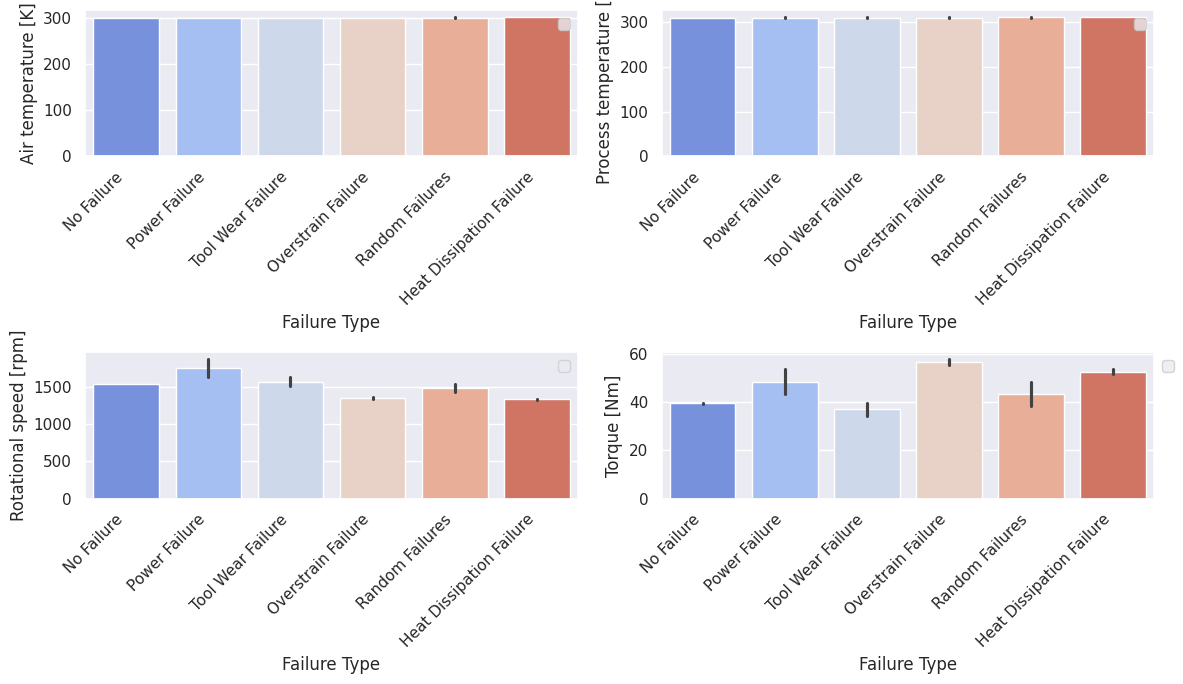

In [ ]:
sns.set(style="darkgrid")
label_fontsize = 4

fig, axes = plt.subplots(2, 2, figsize=(12, 7))

sns.barplot(data=pred_df,x="Failure Type", y="Air temperature [K]", palette="coolwarm",ax=axes[0,0])
axes[0,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,0].set_xticklabels(axes[0,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=pred_df,x="Failure Type", y="Process temperature [K]", palette="coolwarm",ax=axes[0,1])
axes[0,1].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[0,1].set_xticklabels(axes[0,1].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=pred_df,x="Failure Type", y="Rotational speed [rpm]", palette="coolwarm",ax=axes[1,0])
axes[1,0].legend(loc='upper right', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=45, ha="right")

sns.barplot(data=pred_df,x="Failure Type", y="Torque [Nm]", palette="coolwarm",ax=axes[1,1])
axes[1,1].legend(loc='upper left', bbox_to_anchor=(1, 1))
# Rotate x-axis labels
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=45, ha="right")
plt.tight_layout()

#### Chart 11

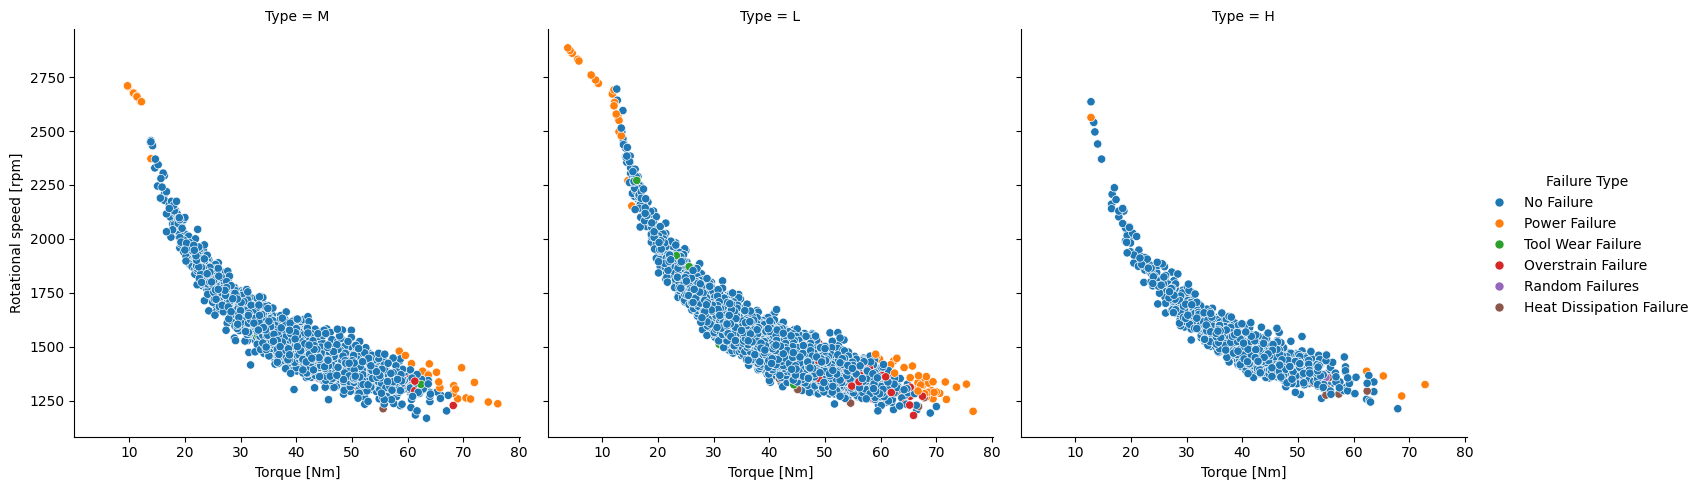

In [ ]:
# Creating relplot of torque vs rotation speed
sns.relplot(data=pred_df, x="Torque [Nm]", y="Rotational speed [rpm]", hue="Failure Type",col="Type",palette='tab10')

#### Chart 12

In [ ]:
pred_df['Failure Type'].value_counts() # Failure Count

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

The data shows that :-  
1. No Failure                  9652
2. Heat Dissipation Failure     112
3. Power Failure                 95
4. Overstrain Failure            78
5. Tool Wear Failure             45
6. Random Failures               18

# Model Preparation, Selection, Training & Evaluation

In [ ]:
# Importing Require Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### FEATURE ENGINEERING

In [ ]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding
pred_df['Failure Type_encoded'] = label_encoder.fit_transform(pred_df['Failure Type'])

pred_df['Failure Type_encoded'].value_counts()

Failure Type_encoded
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

In [ ]:
# Perform one-hot encoding with drop_first=True
df_encoded = pd.get_dummies(pred_df, columns=['Type'], prefix='Type', drop_first=True)
df_encoded.head()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type_encoded,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,1,False,True
1,298.2,308.7,1408,46.3,3,0,No Failure,1,True,False
2,298.1,308.5,1498,49.4,5,0,No Failure,1,True,False
3,298.2,308.6,1433,39.5,7,0,No Failure,1,True,False
4,298.2,308.7,1408,40.0,9,0,No Failure,1,True,False


In [ ]:
pred_df=df_encoded
pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Air temperature [K]      10000 non-null  float64
 1   Process temperature [K]  10000 non-null  float64
 2   Rotational speed [rpm]   10000 non-null  int64  
 3   Torque [Nm]              10000 non-null  float64
 4   Tool wear [min]          10000 non-null  int64  
 5   Target                   10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
 7   Failure Type_encoded     10000 non-null  int64  
 8   Type_L                   10000 non-null  bool   
 9   Type_M                   10000 non-null  bool   
dtypes: bool(2), float64(3), int64(4), object(1)
memory usage: 644.7+ KB


In [ ]:
pred_df['Type_L'].value_counts()

Type_L
True     6000
False    4000
Name: count, dtype: int64

<Axes: >

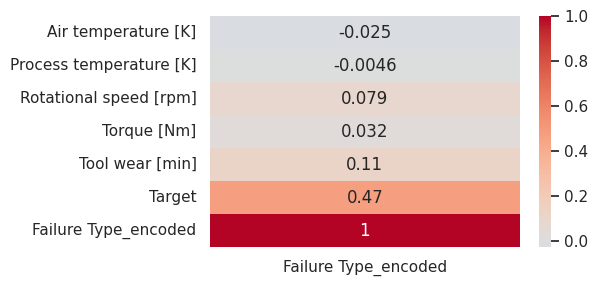

In [ ]:
# Select only the numeric columns
numeric_columns = pred_df.select_dtypes(include=['float64','int64','int32'])

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_columns.corr()

corrfinal = correlation_matrix['Failure Type_encoded'].to_frame()

# Set up the heatmap using seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(corrfinal, annot=True, cmap='coolwarm', center=0)

### MODEL Prep - Train Test Split and Balancing

Applying SMOTETomek and a visual of before/after

Class distribution before balancing:
Failure Type_encoded
1    9652
0     112
3      95
2      78
5      45
4      18
Name: count, dtype: int64

Class distribution after balancing:
Failure Type_encoded
2    7716
5    7712
3    7710
0    7708
4    7708
1    7688
Name: count, dtype: int64


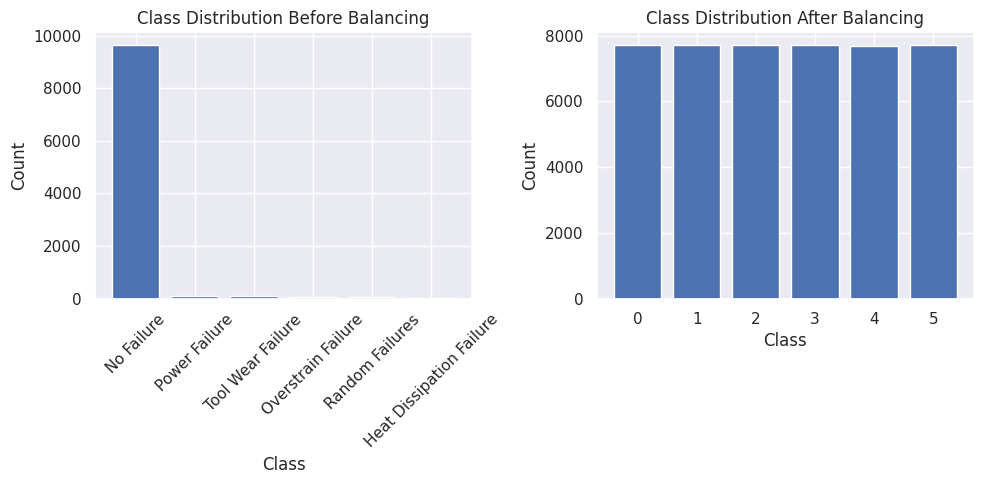

In [ ]:
from imblearn.combine import SMOTETomek

# Define features and target
X = pred_df.drop(['Failure Type','Target','Failure Type_encoded'], axis=1).values
y = pred_df['Failure Type_encoded'].values

# Split data into train, validation, and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

# Count the original class distribution
print("Class distribution before balancing:")
print(pred_df['Failure Type_encoded'].value_counts())

smt=SMOTETomek(sampling_strategy='auto',random_state=42)

X_trainresampled, y_trainresampled = smt.fit_resample(X_train, y_train)

# Convert the resampled dataset to a DataFrame
df_resampled = pd.DataFrame(X_trainresampled, columns=[f'feature_{i}' for i in range(X_trainresampled.shape[1])])
df_resampled['Failure Type_encoded'] = y_trainresampled

# Count the class distribution after balancing
print("\nClass distribution after balancing:")
print(df_resampled['Failure Type_encoded'].value_counts())

#Visualize the class distribution before and after balancing
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(pred_df['Failure Type'].unique(), pred_df['Failure Type'].value_counts())
plt.title("Class Distribution Before Balancing")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(df_resampled['Failure Type_encoded'].unique(), df_resampled['Failure Type_encoded'].value_counts())
plt.title("Class Distribution After Balancing")
plt.xlabel("Class")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data after SMOTETomek
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_trainresampled)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(46242, 7)

### MODEL TRAINING AND EVALUATION

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report # Importing Libraries
from sklearn.model_selection import cross_val_score # Importing Libraries

In [ ]:
rfc = RandomForestClassifier(random_state=42)
scores=cross_val_score(rfc,X_train_scaled,y_trainresampled,cv=5,scoring='f1_macro')
print("CrossValscores:",scores)
print("meanCV score:",scores.mean())

CrossValscores: [0.99479807 0.99488462 0.99564959 0.99772099 0.99510001]
meanCV score: 0.995630655551764


In [ ]:
rfc.fit(X_train_scaled, y_trainresampled)

predictionstrain = rfc.predict(X_train_scaled)
print(classification_report(y_trainresampled,predictionstrain))
print(confusion_matrix(y_trainresampled,predictionstrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7708
           1       1.00      1.00      1.00      7688
           2       1.00      1.00      1.00      7716
           3       1.00      1.00      1.00      7710
           4       1.00      1.00      1.00      7708
           5       1.00      1.00      1.00      7712

    accuracy                           1.00     46242
   macro avg       1.00      1.00      1.00     46242
weighted avg       1.00      1.00      1.00     46242

[[7708    0    0    0    0    0]
 [   0 7688    0    0    0    0]
 [   0    0 7716    0    0    0]
 [   0    0    0 7710    0    0]
 [   0    0    0    0 7708    0]
 [   0    0    0    0    0 7712]]


In [ ]:
predictionstest = rfc.predict(X_test_scaled)
print(classification_report(y_test,predictionstest))
print(confusion_matrix(y_test,predictionstest))

              precision    recall  f1-score   support

           0       0.56      0.67      0.61        15
           1       0.99      0.98      0.98      1935
           2       0.56      0.77      0.65        13
           3       0.59      0.80      0.68        20
           4       0.00      0.00      0.00         6
           5       0.05      0.09      0.07        11

    accuracy                           0.96      2000
   macro avg       0.46      0.55      0.50      2000
weighted avg       0.97      0.96      0.97      2000

[[  10    5    0    0    0    0]
 [   7 1889    7   11    4   17]
 [   1    2   10    0    0    0]
 [   0    4    0   16    0    0]
 [   0    5    0    0    0    1]
 [   0    9    1    0    0    1]]


In [ ]:
import xgboost as xgb # Importing xgboost

In [ ]:
xgbmodel=xgb.XGBClassifier(objective='multi:softmax', num_class=6,random_state=42)

xgbmodel.fit(X_train_scaled, y_trainresampled)

predictionstest=xgbmodel.predict(X_test_scaled)

print(classification_report(y_test,predictionstest))
print(confusion_matrix(y_test,predictionstest))

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.99      0.98      0.99      1935
           2       0.73      0.85      0.79        13
           3       0.68      0.85      0.76        20
           4       0.00      0.00      0.00         6
           5       0.16      0.36      0.22        11

    accuracy                           0.97      2000
   macro avg       0.59      0.66      0.62      2000
weighted avg       0.98      0.97      0.98      2000

[[  14    1    0    0    0    0]
 [   0 1899    3    8    5   20]
 [   0    2   11    0    0    0]
 [   0    3    0   17    0    0]
 [   0    5    0    0    0    1]
 [   0    6    1    0    0    4]]


### Model Comparison

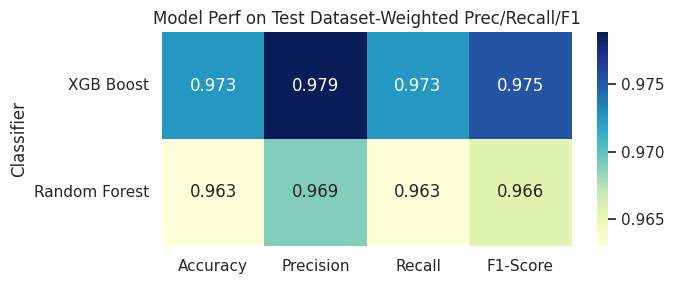

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define your classifiers here
classifiers = [
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("XGB Boost", xgb.XGBClassifier(objective='multi:softmax', num_class=6,random_state=42))
]


results = []
for name, clf in classifiers:
    clf.fit(X_train_scaled, y_trainresampled)
    y_pred = clf.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred,average='weighted')
    recall = recall_score(y_test, y_pred,average='weighted')
    f1 = f1_score(y_test, y_pred,average='weighted')

    results.append([name, accuracy, precision, recall, f1])

# Convert the results to a DataFrame
results_df = pd.DataFrame(results, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1-Score"])

# Sort the DataFrame by F1-Score in descending order
results_df = results_df.sort_values(by="F1-Score", ascending=False)

# Create a heatmap to compare metrics
plt.figure(figsize=(7, 3))
sns.heatmap(results_df.set_index("Classifier"), annot=True, fmt=".3f", cmap="YlGnBu", xticklabels=["Accuracy", "Precision", "Recall", "F1-Score"])
plt.title("Model Perf on Test Dataset-Weighted Prec/Recall/F1")
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
pred_df

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,Failure Type_encoded,Type_L,Type_M
0,298.1,308.6,1551,42.8,0,0,No Failure,1,False,True
1,298.2,308.7,1408,46.3,3,0,No Failure,1,True,False
2,298.1,308.5,1498,49.4,5,0,No Failure,1,True,False
3,298.2,308.6,1433,39.5,7,0,No Failure,1,True,False
4,298.2,308.7,1408,40.0,9,0,No Failure,1,True,False
...,...,...,...,...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0,No Failure,1,False,True
9996,298.9,308.4,1632,31.8,17,0,No Failure,1,False,False
9997,299.0,308.6,1645,33.4,22,0,No Failure,1,False,True
9998,299.0,308.7,1408,48.5,25,0,No Failure,1,False,False


### PLOTTING FEATURE IMPORTANCE

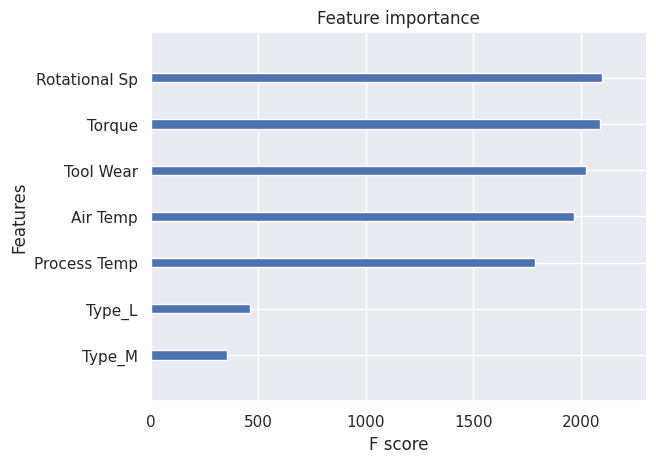

In [ ]:
dfdropped=pred_df.drop(['Failure Type','Target','Failure Type_encoded'],axis=1)
# Convert the resampled dataset to a DataFrame
orig_feature_namesx = list(dfdropped.columns)
df_convertedx = pd.DataFrame(X_train_scaled, columns=orig_feature_namesx)

df_convertedx.rename(columns = {'Air temperature [K]':'Air Temp','Process temperature [K]':'Process Temp','Rotational speed [rpm]':'Rotational Sp','Torque [Nm]':'Torque','Tool wear [min]':'Tool Wear'}, inplace = True)

# Convert Pandas series to DataFrame.
my_series = pd.Series(y_trainresampled)
dfconvertedy = my_series.to_frame("Failure Type_encoded")

xgbmodel = xgb.XGBClassifier(objective='multi:softmax', num_class=6,random_state=42)
xgbmodel.fit(df_convertedx,dfconvertedy)

xgb.plot_importance(xgbmodel,show_values=False)
plt.show()

We observed that XGBoost (XGB) performs better overall in classifying the minority target classes. This improvement is not immediately apparent in the overall comparison scores, as the minority target classes represent a very small percentage compared to the majority class. To get a clearer picture of the classification performance for each target class, we analyzed the confusion matrices and classification reports of both models. These detailed metrics highlight the superior performance of XGB in identifying the minority classes.

Additionally, we found that feature engineering significantly impacted the features related to rotation speed and torque. The extensive feature engineering applied to these variables played a crucial role in enhancing the model's accuracy and performance.


# Conclusion

In industrial settings, predictive maintenance is crucial for optimizing maintenance schedules and preventing unexpected equipment failures. This study aimed to accurately predict machine failures using a synthetic dataset designed to mimic real-world industrial maintenance scenarios. The dataset included 10,000 data points with 14 features each, focusing on factors like rotational speed and torque.

By applying SMOTETomek for data balancing and visualizing the dataset before and after this application, we enhanced the dataset's quality. We utilized both Random Forest and XGBoost models to predict machine failures. Our findings indicate that XGBoost provided more precise predictions compared to Random Forest. These results underscore the importance of using advanced machine learning techniques and balanced datasets to improve the accuracy of predictive maintenance models.
